In [81]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas_profiling
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

import pickle

%matplotlib inline

# Загрузка данный, разведовательный анализ

In [34]:
path1 = '/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx'
path2 = '/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx'
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)
print(df1.shape)
print(df2.shape)

(1023, 11)
(1040, 4)


In [ ]:
df1.head(3)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
df2.head(3)

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.0,57.0
1,1,0,4.0,60.0
2,2,0,4.0,70.0


In [ ]:
print(sum(df1.isnull().sum()))
print(sum(df2.isnull().sum()))

0
0


<Axes: xlabel='Шаг нашивки', ylabel='count'>

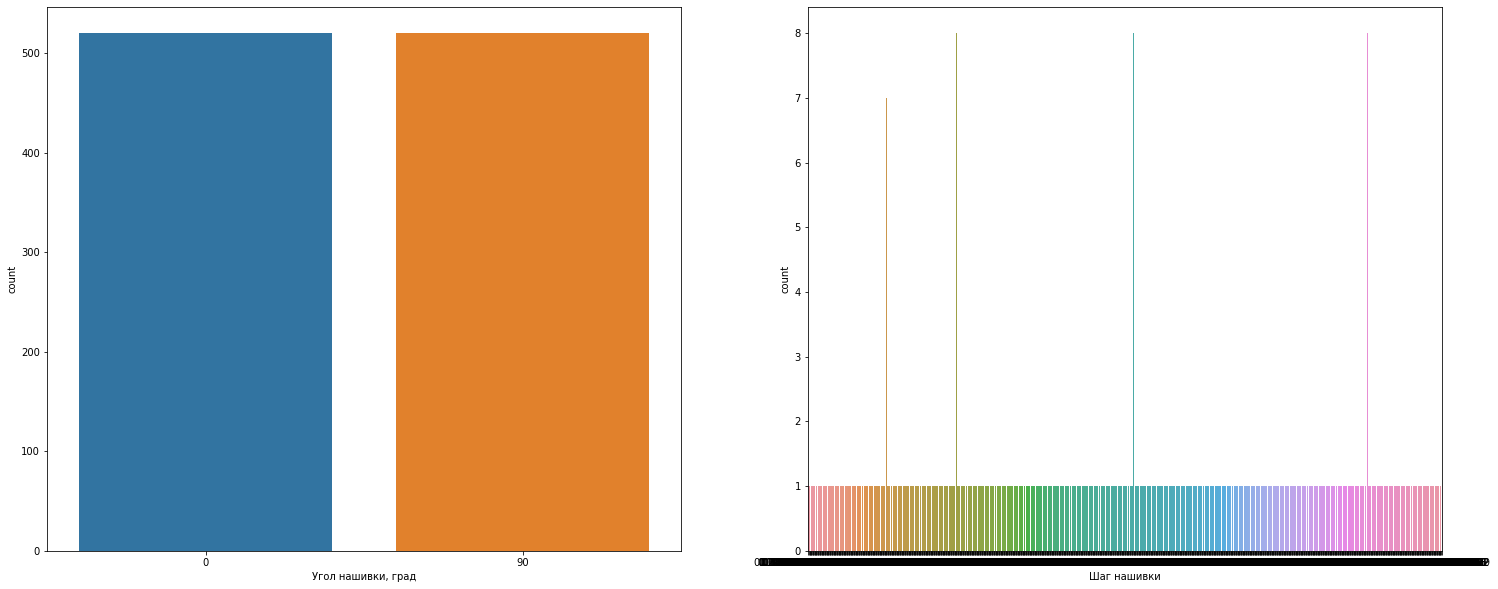

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(121)
sns.countplot(x='Угол нашивки, град', data=df2)
ax = fig.add_subplot(122)
sns.countplot(x='Шаг нашивки', data=df2)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [35]:
df = pd.merge(df1, df2, on='Unnamed: 0', how='inner')
print(df.shape)
print(df1.shape)
print(df2.shape)
df.head(2)

(1023, 14)
(1023, 11)
(1040, 4)


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0


In [36]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(3)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0


In [ ]:
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
scatter_matrix(df, alpha=0.2, figsize=(35, 35), diagonal='kde');

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

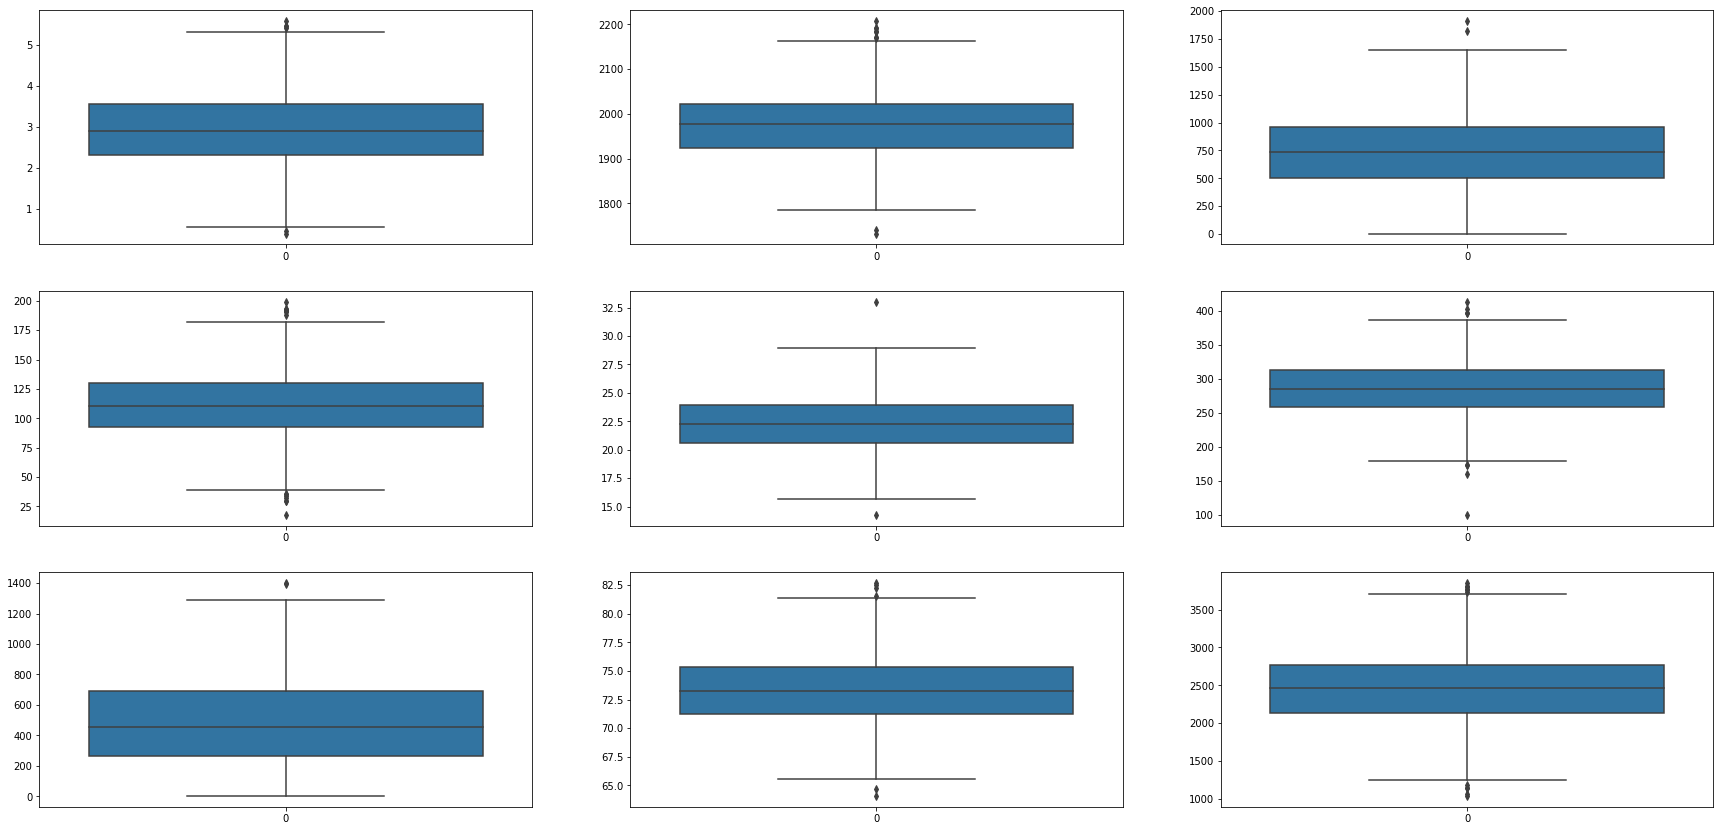

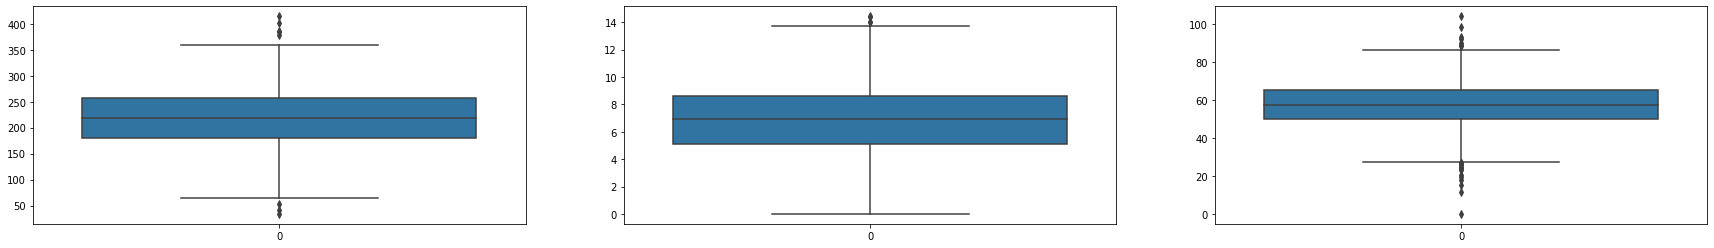

In [ ]:
fig = plt.figure(figsize=(30, 25))
ax = fig.add_subplot(531)
sns.boxplot(df['Соотношение матрица-наполнитель'])
ax = fig.add_subplot(532)
sns.boxplot(df['Плотность, кг/м3'])
ax = fig.add_subplot(533)
sns.boxplot(df['модуль упругости, ГПа'])
ax = fig.add_subplot(534)
sns.boxplot(df['Количество отвердителя, м.%'])
ax = fig.add_subplot(535)
sns.boxplot(df['Содержание эпоксидных групп,%_2'])
ax = fig.add_subplot(536)
sns.boxplot(df['Температура вспышки, С_2'])
ax = fig.add_subplot(537)
sns.boxplot(df['Поверхностная плотность, г/м2'])
ax = fig.add_subplot(538)
sns.boxplot(df['Модуль упругости при растяжении, ГПа'])
ax = fig.add_subplot(539)
sns.boxplot(df['Прочность при растяжении, МПа'])
fig2 = plt.figure(figsize=(30, 4))
ax = fig2.add_subplot(131)
sns.boxplot(df['Потребление смолы, г/м2'])
ax = fig2.add_subplot(132)
sns.boxplot(df['Шаг нашивки'])
ax = fig2.add_subplot(133)
sns.boxplot(df['Плотность нашивки'])

# Обработка данный

<Axes: >

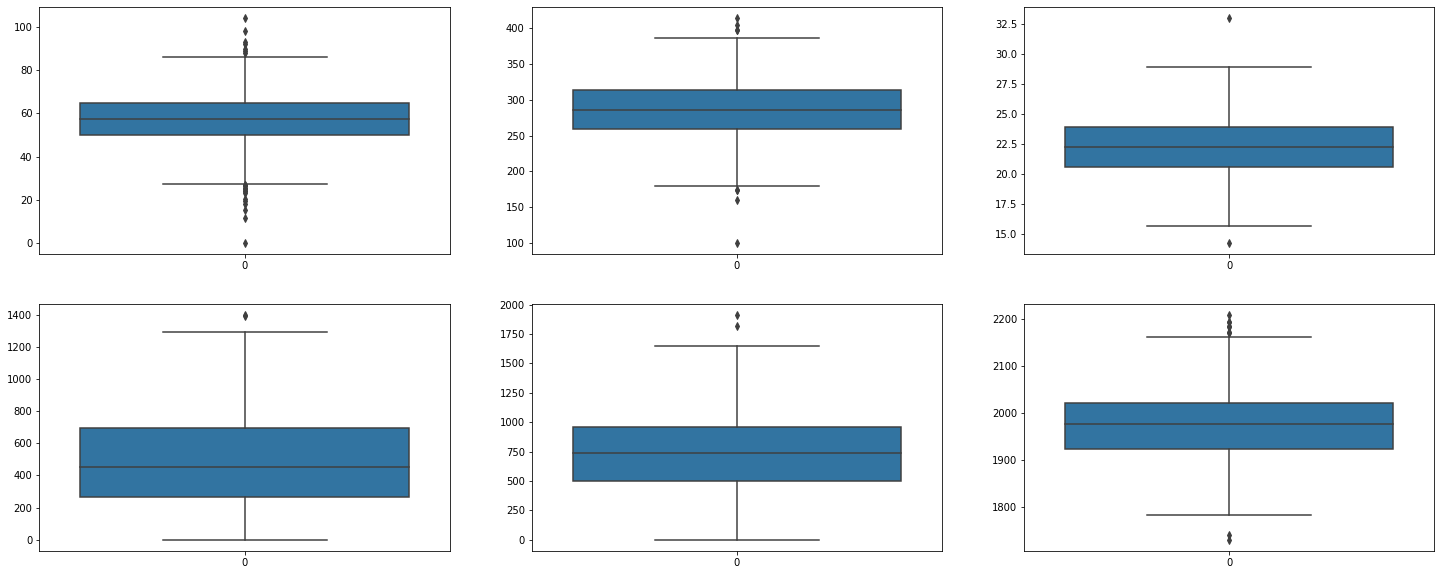

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(231)
sns.boxplot(df['Плотность нашивки'])
ax = fig.add_subplot(232)
sns.boxplot(df['Температура вспышки, С_2'])
ax = fig.add_subplot(233)
sns.boxplot(df['Содержание эпоксидных групп,%_2'])
ax = fig.add_subplot(234)
sns.boxplot(df['Поверхностная плотность, г/м2'])
ax = fig.add_subplot(235)
sns.boxplot(df['модуль упругости, ГПа'])
ax = fig.add_subplot(236)
sns.boxplot(df['Плотность, кг/м3'])

In [ ]:
df.shape

(1023, 13)

In [37]:
# Обработка выбрасов и шумов
# Столбец: Плотность нашивки
for x in ['Плотность нашивки']:
    df.loc[df[x] > 95,x] = np.nan
    df.loc[df[x] < 9,x] = np.nan

# Столбец: Температура вспышки, С_2
for x in ['Температура вспышки, С_2']:
    df.loc[df[x] > 400,x] = np.nan
    df.loc[df[x] < 150,x] = np.nan

# Столбец: Содержание эпоксидных групп,%_2
for x in ['Содержание эпоксидных групп,%_2']:
    df.loc[df[x] > 30,x] = np.nan
    df.loc[df[x] < 15,x] = np.nan

# Столбец: Поверхностная плотность, г/м2
for x in ['Поверхностная плотность, г/м2']:
    df.loc[df[x] > 1330,x] = np.nan
    df.loc[df[x] < 2,x] = np.nan

# Столбец: модуль упругости, ГПа
for x in ['модуль упругости, ГПа']:
    df.loc[df[x] > 1700,x] = np.nan
    df.loc[df[x] < 2,x] = np.nan

# Столбец: Плотность, кг/м3
for x in ['Плотность, кг/м3']:
    df.loc[df[x] > 2195,x] = np.nan
    df.loc[df[x] < 1760,x] = np.nan

# Удаление выбрасов и шумов
df = df.dropna()
df.shape

(1005, 13)

<Axes: >

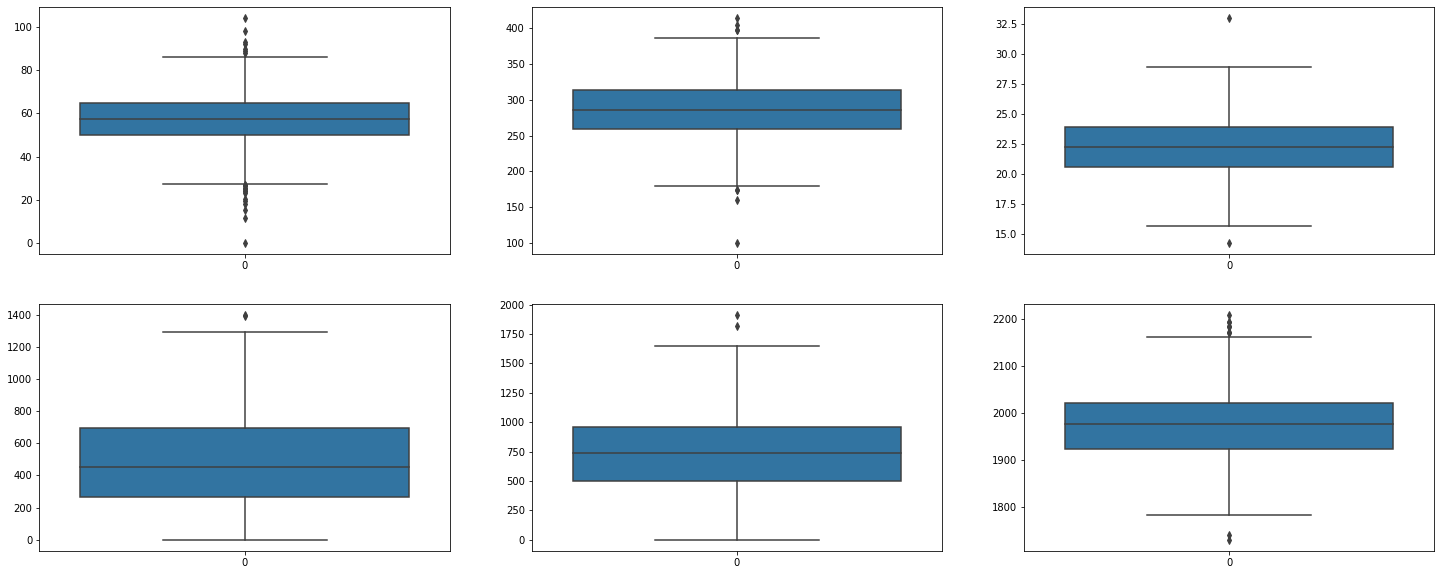

In [ ]:
# После обработки выбрасов и шумов
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(231)
sns.boxplot(df['Плотность нашивки'])
ax = fig.add_subplot(232)
sns.boxplot(df['Температура вспышки, С_2'])
ax = fig.add_subplot(233)
sns.boxplot(df['Содержание эпоксидных групп,%_2'])
ax = fig.add_subplot(234)
sns.boxplot(df['Поверхностная плотность, г/м2'])
ax = fig.add_subplot(235)
sns.boxplot(df['модуль упругости, ГПа'])
ax = fig.add_subplot(236)
sns.boxplot(df['Плотность, кг/м3'])

In [38]:
# Проверяем остались ли пропущенные значения
sum(df.isnull().sum())

0

In [ ]:
df.head(2)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [39]:
le = preprocessing.LabelEncoder()
def cat (dataset, namecol):
    le.fit(dataset[namecol])
    y = le.transform(dataset[namecol])
    dataset[namecol] = y
    return  dataset.head(2)

cat(df, 'Угол нашивки, град')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [40]:
# выполним необходимые вычисления для получения в дальнейшем исходных значений для столбцов "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении"

max_mod_elastic = df['Модуль упругости при растяжении, ГПа'].max()
max_strength = df['Прочность при растяжении, МПа'].max()
min_mod_elastic = df['Модуль упругости при растяжении, ГПа'].min()
min_strength = df['Прочность при растяжении, МПа'].min()
print('Max Модуль упругости при растяжении, ГПа: ', max_mod_elastic)
print('Max Прочность при растяжении: ', max_strength)
print('Min Модуль упругости при растяжении, ГПа: ', min_mod_elastic)
print('Min Прочность при растяжении: ', min_strength)

Max Модуль упругости при растяжении, ГПа:  82.682051035271
Max Прочность при растяжении:  3848.43673187618
Min Модуль упругости при растяжении, ГПа:  64.0540605597917
Min Прочность при растяжении:  1036.85660535


In [41]:
# стандартизация
scaler = preprocessing.MinMaxScaler()

transform_data = df.copy(deep=True)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = transform_data.columns
d = scaler.fit_transform(transform_data)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.178021,0.607435,0.524955,0.159955,0.319194,0.698235,0.488979,0.0,0.275109,0.594162
1,0.282131,0.601381,0.447061,0.613972,0.418887,0.589898,0.159955,0.319194,0.698235,0.488979,0.0,0.344539,0.434110
2,0.457857,0.601381,0.455721,0.519387,0.495653,0.524955,0.159955,0.319194,0.698235,0.488979,0.0,0.344539,0.557227
3,0.457201,0.527898,0.452685,0.519387,0.495653,0.524955,0.159955,0.319194,0.698235,0.488979,0.0,0.344539,0.594162
4,0.419084,0.307448,0.488508,0.519387,0.495653,0.524955,0.159955,0.319194,0.698235,0.488979,0.0,0.344539,0.717280


In [42]:
# создаем два разных дата фрейма с исходными значениями для столбцов "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении"

df_mod_elastic = scaled_df.copy(deep=True)
df_mod_elastic['Модуль упругости при растяжении, ГПа'] = (df_mod_elastic['Модуль упругости при растяжении, ГПа'] * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic
df_strength = scaled_df.copy(deep=True)
df_strength['Прочность при растяжении, МПа'] = (df_strength['Прочность при растяжении, МПа'] * (max_strength - min_strength)) + min_strength

In [ ]:
scaled_df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
DataFrame_mod_elastic = df_mod_elastic.copy(deep=True)
DataFrame_df_strength = df_strength.copy(deep=True)

In [44]:
# Target
target_elastic = DataFrame_mod_elastic['Модуль упругости при растяжении, ГПа']
target_strength = DataFrame_df_strength['Прочность при растяжении, МПа']

print(target_elastic)
print(target_strength)

0       70.000000
1       70.000000
2       70.000000
3       70.000000
4       70.000000
          ...    
1000    73.090961
1001    72.920827
1002    74.734344
1003    74.042708
1004    74.309704
Name: Модуль упругости при растяжении, ГПа, Length: 1005, dtype: float64
0       3000.000000
1       3000.000000
2       3000.000000
3       3000.000000
4       3000.000000
           ...     
1000    2387.292495
1001    2360.392784
1002    2662.906040
1003    2071.715856
1004    2856.328932
Name: Прочность при растяжении, МПа, Length: 1005, dtype: float64


In [45]:
# Data
data_elastic = DataFrame_mod_elastic.drop(['Модуль упругости при растяжении, ГПа'], axis=1, inplace=False)
data_strength = DataFrame_df_strength.drop(['Прочность при растяжении, МПа'], axis=1, inplace=False)

data_elastic.head(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.178021,0.607435,0.524955,0.159955,0.698235,0.488979,0.0,0.275109,0.594162


In [46]:
data_strength.head(1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.178021,0.607435,0.524955,0.159955,0.319194,0.488979,0.0,0.275109,0.594162


In [47]:
target_elastic = np.array(target_elastic)
target_strength = np.array(target_strength)

data_elastic = np.array(data_elastic)
data_strength = np.array(data_strength)

print('target_elastic :', target_elastic)
print('target_strength :', target_strength)
print('data_elastic :', data_elastic)
print('data_strength :', data_strength)

target_elastic : [70.         70.         70.         ... 74.7343437  74.04270842
 74.309704  ]
target_strength : [3000.         3000.         3000.         ... 2662.90603955 2071.71585567
 2856.32893217]
data_elastic : [[0.28213084 0.60138107 0.44706097 ... 0.         0.27510888 0.59416245]
 [0.28213084 0.60138107 0.44706097 ... 0.         0.34453943 0.43410999]
 [0.45785722 0.60138107 0.45572116 ... 0.         0.34453943 0.55722727]
 ...
 [0.55575038 0.46022685 0.25161199 ... 1.         0.28629789 0.68809705]
 [0.63739572 0.69151992 0.44872381 ... 1.         0.43571567 0.57275327]
 [0.65713085 0.2594722  0.25190326 ... 1.         0.41944815 0.80881088]]
data_strength : [[0.28213084 0.60138107 0.44706097 ... 0.         0.27510888 0.59416245]
 [0.28213084 0.60138107 0.44706097 ... 0.         0.34453943 0.43410999]
 [0.45785722 0.60138107 0.45572116 ... 0.         0.34453943 0.55722727]
 ...
 [0.55575038 0.46022685 0.25161199 ... 1.         0.28629789 0.68809705]
 [0.63739572 0.69151992

In [48]:
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(data_elastic, target_elastic, test_size=0.3, random_state=42)

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(data_strength, target_strength, test_size=0.3, random_state=42)

In [49]:
print(X_train_E.shape)
print(X_test_E.shape)
print(y_train_E.shape)
print(y_test_E.shape)
print('\n')
print(X_train_S.shape)
print(X_test_S.shape)
print(y_train_S.shape)
print(y_test_S.shape)

(703, 12)
(302, 12)
(703,)
(302,)


(703, 12)
(302, 12)
(703,)
(302,)


# Построение модели



In [50]:
slr_E = LinearRegression()
slr_E.fit(X_train_E, y_train_E)
y_train_pred_E = slr_E.predict(X_train_E)
y_test_pred_E = slr_E.predict(X_test_E)
print('Slope E: {:.2f}'.format(slr_E.coef_[0]))
print('Intercept E: {:.2f}'.format(slr_E.intercept_))

print('\n')

slr_S = LinearRegression()
slr_S.fit(X_train_S, y_train_S)
y_train_pred_S = slr_S.predict(X_train_S)
y_test_pred_S = slr_S.predict(X_test_S)
print('Slope S: {:.2f}'.format(slr_S.coef_[0])) # Наклон
print('Intercept S: {:.2f}'.format(slr_S.intercept_)) # Пересечение с осью У

print('\n')

print('MSE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_squared_error(y_train_E, y_train_pred_E),
        mean_squared_error(y_test_E, y_test_pred_E)))
print('R^2 train_E: {:.3f}, test_E: {:.3f}'.format(
        r2_score(y_train_E, y_train_pred_E),
        r2_score(y_test_E, y_test_pred_E)))
print('MAE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_absolute_error(y_train_E, y_train_pred_E),
        mean_absolute_error(y_test_E, y_test_pred_E)))

print('\n')

print('MSE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_squared_error(y_train_S, y_train_pred_S),
        mean_squared_error(y_test_S, y_test_pred_S)))
print('R^2 train_S: {:.3f}, test_S: {:.3f}'.format(
        r2_score(y_train_S, y_train_pred_S),
        r2_score(y_test_S, y_test_pred_S)))
print('MAE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_absolute_error(y_train_S, y_train_pred_S),
        mean_absolute_error(y_test_S, y_test_pred_S)))

#   MSE (средняя квадратическая ошибка) — это оценка среднего значения квадрата ошибок, различие между предсказанием 
# и фактическим значением. Эту метрику удобно использовать для выявления аномалий.
#   MAE (средняя абсолютная ошибка) — это оценка того, насколько близки предсказания к фактическим значениями. 
# Эта метрика менее чувствительна к выбросам и может дать общее представление о качестве модели.

Slope E: -0.90
Intercept E: 74.35


Slope S: 61.75
Intercept S: 2762.15


MSE train_E: 9.003, test_E: 11.048
R^2 train_E: 0.029, test_E: -0.026
MAE train_E: 2.388, test_E: 2.707


MSE train_S: 220091.245, test_S: 255115.506
R^2 train_S: 0.033, test_S: -0.024
MAE train_S: 372.097, test_S: 403.826


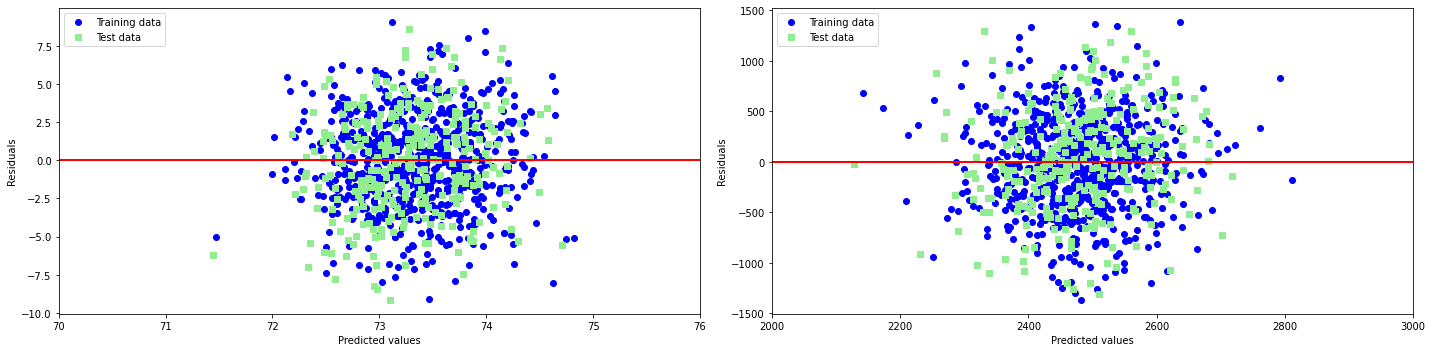

In [51]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)
plt.scatter(y_train_pred_E,  y_train_pred_E - y_train_E,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_E,  y_test_pred_E - y_test_E,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([70, 76])
plt.tight_layout()

ax = fig.add_subplot(122)
plt.scatter(y_train_pred_S,  y_train_pred_S - y_train_S,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_S,  y_test_pred_S - y_test_S,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=2000, xmax=3000, lw=2, color='red')
plt.xlim([2000, 3000])
plt.tight_layout()

# Пробуем удалить больше выбросов для получения лучшей точности модели

In [52]:
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

df_filter = df.copy(deep=True)

for i in column_list_drop:
    q75, q25 = np.percentile(df_filter.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df_filter.loc[df[i] < min, i] = np.nan
    df_filter.loc[df[i] > max, i] = np.nan

df_filter.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         6
модуль упругости, ГПа                    0
Количество отвердителя, м.%             13
Содержание эпоксидных групп,%_2          0
Температура вспышки, С_2                 5
Поверхностная плотность, г/м2            0
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  7
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       17
dtype: int64

In [53]:
df_filter = df_filter.dropna(axis=0)
print(df.shape)
df_filter.isnull().sum()

(1005, 13)


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Max Модуль упругости при растяжении, ГПа:  81.4171259444738
Max Прочность при растяжении:  3705.67252336168
Min Модуль упругости при растяжении, ГПа:  65.5533359100584
Min Прочность при растяжении:  1250.39280220501


Slope E: -0.37
Intercept E: 71.98


Slope S: 12.81
Intercept S: 2634.80


MSE train_E: 9.649, test_E: 7.938
R^2 train_E: 0.017, test_E: -0.007
MAE train_E: 2.504, test_E: 2.293


MSE train_S: 215652.680, test_S: 198321.535
R^2 train_S: 0.027, test_S: -0.017
MAE train_S: 368.874, test_S: 357.825


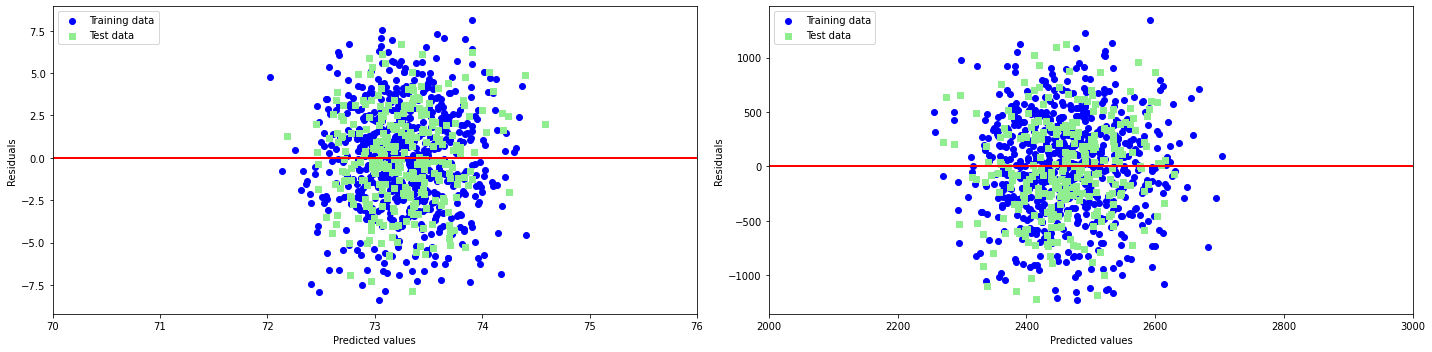

In [54]:
df = df_filter.copy(deep=True)

max_mod_elastic = df['Модуль упругости при растяжении, ГПа'].max()
max_strength = df['Прочность при растяжении, МПа'].max()
min_mod_elastic = df['Модуль упругости при растяжении, ГПа'].min()
min_strength = df['Прочность при растяжении, МПа'].min()
print('Max Модуль упругости при растяжении, ГПа: ', max_mod_elastic)
print('Max Прочность при растяжении: ', max_strength)
print('Min Модуль упругости при растяжении, ГПа: ', min_mod_elastic)
print('Min Прочность при растяжении: ', min_strength)

# стандартизация
scaler = preprocessing.MinMaxScaler()

transform_data = df.copy(deep=True)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = transform_data.columns
d = scaler.fit_transform(transform_data)
scaled_df = pd.DataFrame(d, columns=names)

# создаем два разных дата фрейма с исходными значениями для столбцов "Модуль упругости при растяжении, ГПа" и "Прочность при растяжении"

df_mod_elastic = scaled_df.copy(deep=True)
df_mod_elastic['Модуль упругости при растяжении, ГПа'] = (df_mod_elastic['Модуль упругости при растяжении, ГПа'] * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic
df_strength = scaled_df.copy(deep=True)
df_strength['Прочность при растяжении, МПа'] = (df_strength['Прочность при растяжении, МПа'] * (max_strength - min_strength)) + min_strength

DataFrame_mod_elastic = df_mod_elastic.copy(deep=True)
DataFrame_df_strength = df_strength.copy(deep=True)

# Target
target_elastic = DataFrame_mod_elastic['Модуль упругости при растяжении, ГПа']
target_strength = DataFrame_df_strength['Прочность при растяжении, МПа']

# Data
data_elastic = DataFrame_mod_elastic.drop(['Модуль упругости при растяжении, ГПа'], axis=1, inplace=False)
data_strength = DataFrame_df_strength.drop(['Прочность при растяжении, МПа'], axis=1, inplace=False)

# Преобразование в np.array
target_elastic = np.array(target_elastic)
target_strength = np.array(target_strength)

data_elastic = np.array(data_elastic)
data_strength = np.array(data_strength)

# train_test_split
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(data_elastic, target_elastic, test_size=0.3, random_state=42)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(data_strength, target_strength, test_size=0.3, random_state=42)

# LinearRegression
print('\n')

slr_E = LinearRegression()
slr_E.fit(X_train_E, y_train_E)
y_train_pred_E = slr_E.predict(X_train_E)
y_test_pred_E = slr_E.predict(X_test_E)
print('Slope E: {:.2f}'.format(slr_E.coef_[0]))
print('Intercept E: {:.2f}'.format(slr_E.intercept_))

print('\n')

slr_S = LinearRegression()
slr_S.fit(X_train_S, y_train_S)
y_train_pred_S = slr_S.predict(X_train_S)
y_test_pred_S = slr_S.predict(X_test_S)
print('Slope S: {:.2f}'.format(slr_S.coef_[0])) # Наклон
print('Intercept S: {:.2f}'.format(slr_S.intercept_)) # Пересечение с осью У

print('\n')

print('MSE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_squared_error(y_train_E, y_train_pred_E),
        mean_squared_error(y_test_E, y_test_pred_E)))
print('R^2 train_E: {:.3f}, test_E: {:.3f}'.format(
        r2_score(y_train_E, y_train_pred_E),
        r2_score(y_test_E, y_test_pred_E)))
print('MAE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_absolute_error(y_train_E, y_train_pred_E),
        mean_absolute_error(y_test_E, y_test_pred_E)))

print('\n')

print('MSE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_squared_error(y_train_S, y_train_pred_S),
        mean_squared_error(y_test_S, y_test_pred_S)))
print('R^2 train_S: {:.3f}, test_S: {:.3f}'.format(
        r2_score(y_train_S, y_train_pred_S),
        r2_score(y_test_S, y_test_pred_S)))
print('MAE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_absolute_error(y_train_S, y_train_pred_S),
        mean_absolute_error(y_test_S, y_test_pred_S)))

# Построение графика
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)
plt.scatter(y_train_pred_E,  y_train_pred_E - y_train_E,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_E,  y_test_pred_E - y_test_E,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=100, lw=2, color='red')
plt.xlim([70, 76])
plt.tight_layout()

ax = fig.add_subplot(122)
plt.scatter(y_train_pred_S,  y_train_pred_S - y_train_S,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_S,  y_test_pred_S - y_test_S,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=2000, xmax=3000, lw=2, color='red')
plt.xlim([2000, 3000])
plt.tight_layout()

Результат несколько улучшился

# Используем другие модели 

Лассо регрессия

In [ ]:
# Лассо регрессия
Lasso_E = linear_model.Lasso(alpha=0.1)
Lasso_E.fit(X_train_E, y_train_E)
y_pred_test_Lasso_E = Lasso_E.predict(X_test_E)
y_pred_train_Lasso_E = Lasso_E.predict(X_train_E)
Lasso_S = linear_model.Lasso(alpha=0.1)
Lasso_S.fit(X_train_S, y_train_S)
y_pred_test_Lasso_S = Lasso_S.predict(X_test_S)
y_pred_train_Lasso_S = Lasso_S.predict(X_train_S)


print("Train Lasso score_E: {:.2f}".format(Lasso_E.score(X_train_E, y_train_E)))
print("Test Lasso score_E: {:.2f}".format(Lasso_E.score(X_test_E, y_test_E)))
print("Train Lasso score_S: {:.2f}".format(Lasso_S.score(X_train_S, y_train_S)))
print("Test Lasso score_S: {:.2f}".format(Lasso_S.score(X_test_S, y_test_S)))
print('\n')
print('MSE Lasso train_E: {:.3f}, test_E: {:.3f}'.format(mean_squared_error(y_train_E, y_pred_train_Lasso_E), mean_squared_error(y_test_E, y_pred_test_Lasso_E)))
print('R^2 Lasso train_E: {:.3f}, test_E: {:.3f}'.format(r2_score(y_train_E, y_pred_train_Lasso_E), r2_score(y_test_E, y_pred_test_Lasso_E)))
print('MAE Lasso train_E: {:.3f}, test_E: {:.3f}'.format(mean_absolute_error(y_train_E, y_pred_train_Lasso_E), mean_absolute_error(y_test_E, y_pred_test_Lasso_E)))
print('\n')
print('MSE Lasso train_S: {:.3f}, test_S: {:.3f}'.format(mean_squared_error(y_train_S, y_pred_train_Lasso_S), mean_squared_error(y_test_S, y_pred_test_Lasso_S)))
print('R^2 Lasso train_S: {:.3f}, test_S: {:.3f}'.format(r2_score(y_train_S, y_pred_train_Lasso_S), r2_score(y_test_S, y_pred_test_Lasso_S)))
print('MAE Lasso train_S: {:.3f}, test_S: {:.3f}'.format(mean_absolute_error(y_train_S, y_pred_train_Lasso_S), mean_absolute_error(y_test_S, y_pred_test_Lasso_S)))

Train Lasso score_E: 0.00
Test Lasso score_E: -0.00
Train Lasso score_S: 0.03
Test Lasso score_S: -0.02


MSE Lasso train_E: 9.814, test_E: 7.889
R^2 Lasso train_E: 0.000, test_E: -0.000
MAE Lasso train_E: 2.524, test_E: 2.286


MSE Lasso train_S: 215655.479, test_S: 198256.091
R^2 Lasso train_S: 0.027, test_S: -0.017
MAE Lasso train_S: 368.852, test_S: 357.769


DecisionTreeRegressor

In [ ]:
# Проведем поиск  по сетке гиперпараметров с перекрестной проверкой
dtr = DecisionTreeRegressor()
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['best', 'random']
max_depth = [3,5,7,9,11,13]
min_samples_leaf = [100,150,200,250]
min_samples_split = [200,250,300,350]
max_features = ['auto', 'sqrt', 'log2']
param_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2), 
#если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.

gs_E = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs_E.fit(X_train_E, y_train_E)
dtr_E = gs_E.best_estimator_
print(gs_E.best_params_)
print('\n')
gs_S = GridSearchCV(dtr, param_grid, cv = 10, verbose = 1, n_jobs=-1, scoring = 'r2')
gs_S.fit(X_train_S, y_train_S)
dtr_S = gs_S.best_estimator_
print(gs_S.best_params_)

Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
{'criterion': 'absolute_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 200, 'min_samples_split': 200, 'splitter': 'best'}


Fitting 10 folds for each of 2304 candidates, totalling 23040 fits
{'criterion': 'poisson', 'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 100, 'min_samples_split': 200, 'splitter': 'best'}


In [79]:
#подставим оптимальные гиперпараметры в нашу модель метода деревья решений
dtr_grid_E = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 11, max_features = 'sqrt',
                      min_samples_leaf = 200, min_samples_split = 200)
dtr_grid_S = DecisionTreeRegressor(criterion = 'poisson', max_depth = 13, max_features = 'log2',
                      min_samples_leaf = 100, min_samples_split = 200)
#Обучаем модель
dtr_grid_E.fit(X_train_E, y_train_E)
dtr_grid_S.fit(X_train_S, y_train_S)
y_pred_test_dtr_E = dtr_grid_E.predict(X_test_E)
y_pred_train_dtr_E = dtr_grid_E.predict(X_train_E)
y_pred_test_dtr_S = dtr_grid_S.predict(X_test_S)
y_pred_train_dtr_S = dtr_grid_S.predict(X_train_S)

print('MSE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_squared_error(y_train_E, y_pred_train_dtr_E), mean_squared_error(y_test_E, y_pred_test_dtr_E)))
print('R^2 dtr train_E: {:.3f}, test_E: {:.3f}'.format(r2_score(y_train_E, y_pred_train_dtr_E), r2_score(y_test_E, y_pred_test_dtr_E)))
print('MAE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_absolute_error(y_train_E, y_pred_train_dtr_E), mean_absolute_error(y_test_E, y_pred_test_dtr_E)))
print('\n')
print('MSE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_squared_error(y_train_S, y_pred_train_dtr_S), mean_squared_error(y_test_S, y_pred_test_dtr_S)))
print('R^2 dtr train_S: {:.3f}, test_S: {:.3f}'.format(r2_score(y_train_S, y_pred_train_dtr_S), r2_score(y_test_S, y_pred_test_dtr_S)))
print('MAE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_absolute_error(y_train_S, y_pred_train_dtr_S), mean_absolute_error(y_test_S, y_pred_test_dtr_S)))

MSE dtr train_E: 9.768, test_E: 7.925
R^2 dtr train_E: 0.005, test_E: -0.005
MAE dtr train_E: 2.506, test_E: 2.278


MSE dtr train_S: 213702.125, test_S: 199169.036
R^2 dtr train_S: 0.036, test_S: -0.021
MAE dtr train_S: 369.093, test_S: 356.014


Stochastic Gradient Descent Regressor

In [ ]:
# Стохастический градиентный спуск (SGD) - Stochastic Gradient Descent Regressor
sdg_E = SGDRegressor()
sdg_S = SGDRegressor()
sdg_E.fit(X_train_E, y_train_E)
sdg_S.fit(X_train_S, y_train_S)
y_pred_test_sdg_E = sdg_E.predict(X_test_E)
y_pred_train_sdg_E = sdg_E.predict(X_train_E)
y_pred_test_sdg_S = sdg_S.predict(X_test_S)
y_pred_train_sdg_S = sdg_S.predict(X_train_S)

print('MSE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_squared_error(y_train_E, y_pred_train_sdg_E), mean_squared_error(y_test_E, y_pred_test_sdg_E)))
print('R^2 dtr train_E: {:.3f}, test_E: {:.3f}'.format(r2_score(y_train_E, y_pred_train_sdg_E), r2_score(y_test_E, y_pred_test_sdg_E)))
print('MAE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_absolute_error(y_train_E, y_pred_train_sdg_E), mean_absolute_error(y_test_E, y_pred_test_sdg_E)))
print('\n')
print('MSE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_squared_error(y_train_S, y_pred_train_sdg_S), mean_squared_error(y_test_S, y_pred_test_sdg_S)))
print('R^2 dtr train_S: {:.3f}, test_S: {:.3f}'.format(r2_score(y_train_S, y_pred_train_sdg_S), r2_score(y_test_S, y_pred_test_sdg_S)))
print('MAE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_absolute_error(y_train_S, y_pred_train_sdg_S), mean_absolute_error(y_test_S, y_pred_test_sdg_S)))

MSE dtr train_E: 9.957, test_E: 8.598
R^2 dtr train_E: -0.015, test_E: -0.090
MAE dtr train_E: 2.525, test_E: 2.385


MSE dtr train_S: 220533.299, test_S: 203048.911
R^2 dtr train_S: 0.005, test_S: -0.041
MAE dtr train_S: 374.199, test_S: 359.829


Gradient Boosting Regressor

In [ ]:
#Метода градиентного бустинга - Gradient Boosting Regressor
gbr_E = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr_S = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr_E.fit(X_train_E, np.ravel(y_train_E))
gbr_S.fit(X_train_S, np.ravel(y_train_S))
y_pred_test_gbr_E = gbr_E.predict(X_test_E)
y_pred_train_gbr_E = gbr_E.predict(X_train_E)
y_pred_test_gbr_S = gbr_S.predict(X_test_S)
y_pred_train_gbr_S = gbr_S.predict(X_train_S)

print('MSE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_squared_error(y_train_E, y_pred_train_gbr_E), mean_squared_error(y_test_E, y_pred_test_gbr_E)))
print('R^2 dtr train_E: {:.3f}, test_E: {:.3f}'.format(r2_score(y_train_E, y_pred_train_gbr_E), r2_score(y_test_E, y_pred_test_gbr_E)))
print('MAE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_absolute_error(y_train_E, y_pred_train_gbr_E), mean_absolute_error(y_test_E, y_pred_test_gbr_E)))
print('\n')
print('MSE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_squared_error(y_train_S, y_pred_train_gbr_S), mean_squared_error(y_test_S, y_pred_test_gbr_S)))
print('R^2 dtr train_S: {:.3f}, test_S: {:.3f}'.format(r2_score(y_train_S, y_pred_train_gbr_S), r2_score(y_test_S, y_pred_test_gbr_S)))
print('MAE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_absolute_error(y_train_S, y_pred_train_gbr_S), mean_absolute_error(y_test_S, y_pred_test_gbr_S)))

MSE dtr train_E: 5.143, test_E: 8.488
R^2 dtr train_E: 0.476, test_E: -0.076
MAE dtr train_E: 1.824, test_E: 2.329


MSE dtr train_S: 105724.694, test_S: 220666.449
R^2 dtr train_S: 0.523, test_S: -0.132
MAE dtr train_S: 257.542, test_S: 385.759


Random Forest Regressor

In [ ]:
# метод случайный лес
rfr_E = RandomForestRegressor(n_estimators=111,max_depth=1, random_state=42, criterion='friedman_mse')
rfr_S = RandomForestRegressor(n_estimators=5,max_depth=1, random_state=42, criterion='friedman_mse')
rfr_E.fit(X_train_E, y_train_E)
rfr_S.fit(X_train_E, y_train_E)

y_pred_test_rfr_E = rfr_E.predict(X_test_E)
y_pred_train_rfr_E = rfr_E.predict(X_train_E)
y_pred_test_rfr_S = rfr_S.predict(X_test_S)
y_pred_train_rfr_S = rfr_S.predict(X_train_S)

print('MSE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_squared_error(y_train_E, y_pred_train_rfr_E), mean_squared_error(y_test_E, y_pred_test_rfr_E)))
print('R^2 dtr train_E: {:.3f}, test_E: {:.3f}'.format(r2_score(y_train_E, y_pred_train_rfr_E), r2_score(y_test_E, y_pred_test_rfr_E)))
print('MAE dtr train_E: {:.3f}, test_E: {:.3f}'.format(mean_absolute_error(y_train_E, y_pred_train_rfr_E), mean_absolute_error(y_test_E, y_pred_test_rfr_E)))
print('\n')
print('MSE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_squared_error(y_train_S, y_pred_train_rfr_S), mean_squared_error(y_test_S, y_pred_test_rfr_S)))
print('R^2 dtr train_S: {:.3f}, test_S: {:.3f}'.format(r2_score(y_train_S, y_pred_train_rfr_S), r2_score(y_test_S, y_pred_test_rfr_S)))
print('MAE dtr train_S: {:.3f}, test_S: {:.3f}'.format(mean_absolute_error(y_train_S, y_pred_train_rfr_S), mean_absolute_error(y_test_S, y_pred_test_rfr_S)))

MSE dtr train_E: 9.599, test_E: 7.917
R^2 dtr train_E: 0.022, test_E: -0.004
MAE dtr train_E: 2.496, test_E: 2.294


MSE dtr train_S: 5939442.024, test_S: 5992505.511
R^2 dtr train_S: -25.806, test_S: -29.734
MAE dtr train_S: 2391.206, test_S: 2407.807


# Результаты по моделям

Составим таблицу с результатами вычислений моделей

In [ ]:
# сравним  метрики
results_table = {'Регрессор': ['LinearRegression', 'Lasso', 'DecisionTreeRegressor', 'SGD', 'Gradient Boosting Regressor', 'Random Forest Regressor'],
                 'MAE Train E': [mean_absolute_error(y_train_E, y_train_pred_E), mean_absolute_error(y_train_E, y_pred_train_Lasso_E), mean_absolute_error(y_train_E, y_pred_train_dtr_E), mean_absolute_error(y_train_E, y_pred_train_sdg_E), mean_absolute_error(y_train_E, y_pred_train_gbr_E), mean_absolute_error(y_train_E, y_pred_train_rfr_E)],
                 'MAE Test E': [mean_absolute_error(y_test_E, y_test_pred_E), mean_absolute_error(y_test_E, y_pred_test_Lasso_E), mean_absolute_error(y_test_E, y_pred_test_dtr_E), mean_absolute_error(y_test_E, y_pred_test_sdg_E), mean_absolute_error(y_test_E, y_pred_test_gbr_E), mean_absolute_error(y_test_E, y_pred_test_rfr_E)], 
                 'MAE Train S': [mean_absolute_error(y_train_S, y_train_pred_S), mean_absolute_error(y_train_S, y_pred_train_Lasso_S), mean_absolute_error(y_train_S, y_pred_train_dtr_S), mean_absolute_error(y_train_S, y_pred_train_sdg_S), mean_absolute_error(y_train_S, y_pred_train_gbr_S), mean_absolute_error(y_train_S, y_pred_train_rfr_S)],
                 'MAE Test S': [mean_absolute_error(y_test_S, y_test_pred_S), mean_absolute_error(y_test_S, y_pred_test_Lasso_S), mean_absolute_error(y_test_S, y_pred_test_dtr_S), mean_absolute_error(y_test_S, y_pred_test_sdg_S), mean_absolute_error(y_test_S, y_pred_test_gbr_S), mean_absolute_error(y_test_S, y_pred_test_rfr_S)]} 
results_table = pd.DataFrame(results_table)
results_table

,Регрессор,MAE Train E,MAE Test E,MAE Train S,MAE Test S
0,LinearRegression,2.504071,2.293154,368.873705,357.824850
1,Lasso,2.523799,2.286086,368.851550,357.768640
2,DecisionTreeRegressor,2.519315,2.277380,370.175737,353.045134
3,SGD,2.525286,2.384834,374.199318,359.829234
4,Gradient Boosting Regressor,1.823571,2.328907,257.541848,385.758860
5,Random Forest Regressor,2.495515,2.294377,2391.205598,2407.807370


Строим графики для лучших класификаторов и для сравнения линейную регресию

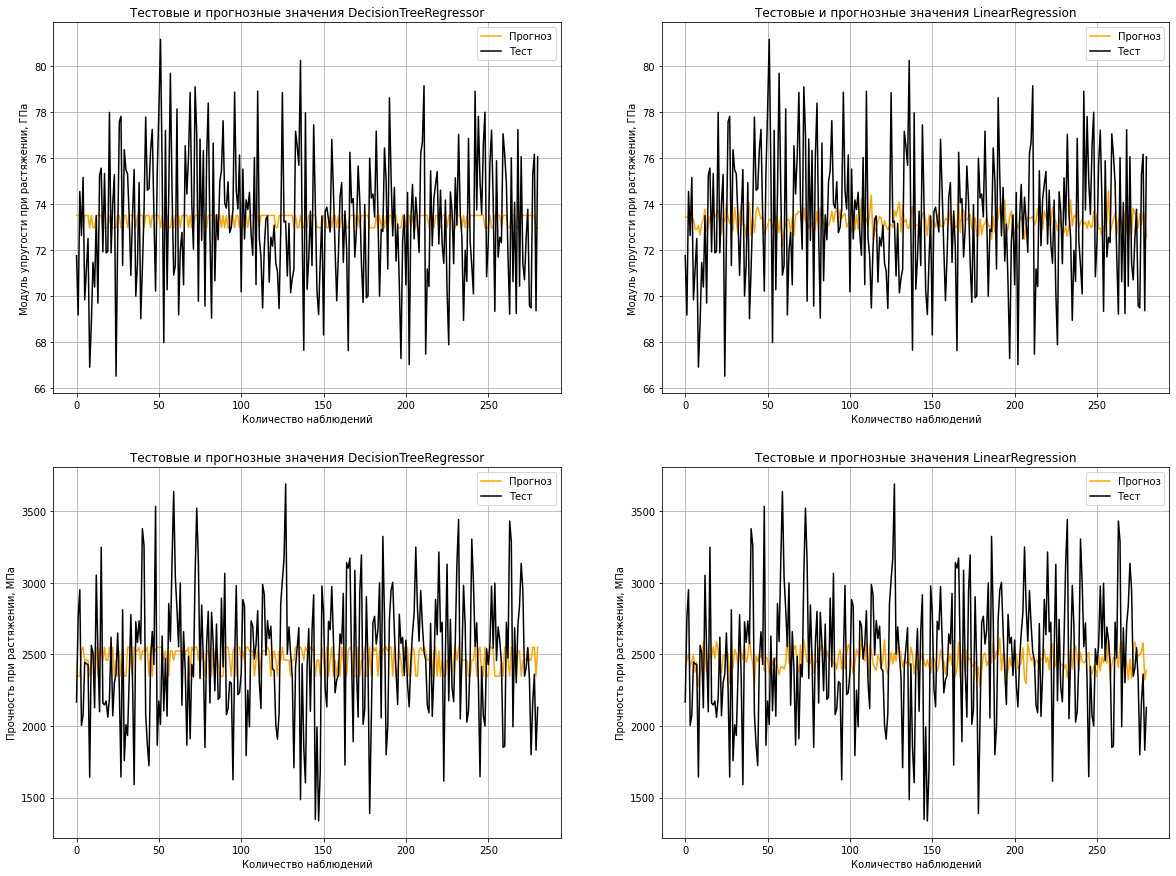

In [ ]:
# DecisionTreeRegressor	для модели Е
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(221)
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y_pred_test_dtr_E, label = "Прогноз", color = "orange")
plt.plot(y_test_E, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# LinearRegression для модели Е
ax = fig.add_subplot(222)
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(y_test_pred_E, label = "Прогноз", color = "orange")
plt.plot(y_test_E, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

# DecisionTreeRegressor для модели S
ax = fig.add_subplot(223)
plt.title("Тестовые и прогнозные значения DecisionTreeRegressor")
plt.plot(y_pred_test_dtr_S, label = "Прогноз", color = "orange")
plt.plot(y_test_S, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

# LinearRegression для модели S
ax = fig.add_subplot(224)
plt.title("Тестовые и прогнозные значения LinearRegression")
plt.plot(y_test_pred_S, label = "Прогноз", color = "orange")
plt.plot(y_test_S, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [ ]:
#Функция для сравнения результатов предсказаний с средним значением по выборки
def mean_model(y_test_1):
    return [np.mean(y_test_1) for i in range(len(y_test_1))]
y_pred_mean_E = mean_model(y_test_E)
y_pred_mean_S = mean_model(y_test_S)

print('MAE mean test_E: {:.3f}'.format(mean_absolute_error(y_test_E, y_pred_mean_E)))
print('MAE mean test_S: {:.3f}'.format(mean_absolute_error(y_test_S, y_pred_mean_S)))
print('Лучшие модели:')
print('MAE DTR test_E: {:.3f}'.format(mean_absolute_error(y_test_E, y_pred_test_dtr_E)))
print('MAE SGD test_S: {:.3f}'.format(mean_absolute_error(y_test_S, y_pred_test_dtr_S)))

MAE mean test_E: 2.285
MAE mean test_S: 353.232
Лучшие модели:
MAE DTR test_E: 2.277
MAE SGD test_S: 353.045


Делаем вывод, что модели выдают результаты несколько лучшие чем простое среднее

# Пробуем обучать на полностью нормализованных данных, результат проходит денормализацию



Slope E: -0.02
Intercept E: 0.40


Slope S: 0.01
Intercept S: 0.56


MSE train_E: 0.038, test_E: 0.032
R^2 train_E: 0.017, test_E: -0.007
MAE train_E: 0.158, test_E: 0.145


MSE train_S: 0.036, test_S: 0.033
R^2 train_S: 0.027, test_S: -0.017
MAE train_S: 0.150, test_S: 0.146


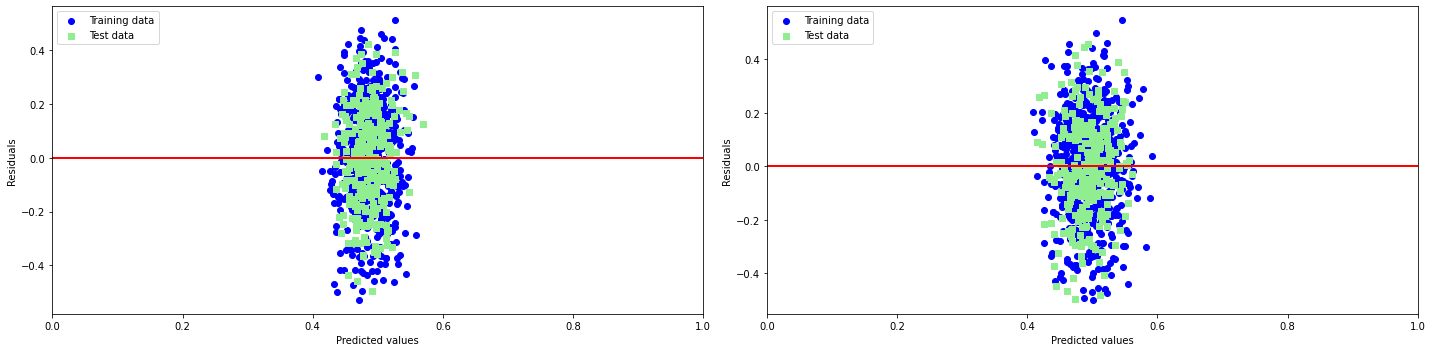

In [ ]:
df1 = df_filter.copy(deep=True)

# стандартизация
scaler = preprocessing.MinMaxScaler()

transform_data = df1.copy(deep=True)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = transform_data.columns
d = scaler.fit_transform(transform_data)
scaled_df = pd.DataFrame(d, columns=names)

DataFrame_mod_elastic = scaled_df.copy(deep=True)
DataFrame_df_strength = scaled_df.copy(deep=True)

# Target
target_elastic = DataFrame_mod_elastic['Модуль упругости при растяжении, ГПа']
target_strength = DataFrame_df_strength['Прочность при растяжении, МПа']

# Data
data_elastic = DataFrame_mod_elastic.drop(['Модуль упругости при растяжении, ГПа'], axis=1, inplace=False)
data_strength = DataFrame_df_strength.drop(['Прочность при растяжении, МПа'], axis=1, inplace=False)

# Преобразование в np.array
target_elastic = np.array(target_elastic)
target_strength = np.array(target_strength)

data_elastic = np.array(data_elastic)
data_strength = np.array(data_strength)

# train_test_split
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(data_elastic, target_elastic, test_size=0.3, random_state=42)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(data_strength, target_strength, test_size=0.3, random_state=42)

# LinearRegression
print('\n')

slr_E = LinearRegression()
slr_E.fit(X_train_E, y_train_E)
y_train_pred_E = slr_E.predict(X_train_E)
y_test_pred_E = slr_E.predict(X_test_E)
print('Slope E: {:.2f}'.format(slr_E.coef_[0]))
print('Intercept E: {:.2f}'.format(slr_E.intercept_))

print('\n')

slr_S = LinearRegression()
slr_S.fit(X_train_S, y_train_S)
y_train_pred_S = slr_S.predict(X_train_S)
y_test_pred_S = slr_S.predict(X_test_S)
print('Slope S: {:.2f}'.format(slr_S.coef_[0])) # Наклон
print('Intercept S: {:.2f}'.format(slr_S.intercept_)) # Пересечение с осью У

print('\n')

print('MSE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_squared_error(y_train_E, y_train_pred_E),
        mean_squared_error(y_test_E, y_test_pred_E)))
print('R^2 train_E: {:.3f}, test_E: {:.3f}'.format(
        r2_score(y_train_E, y_train_pred_E),
        r2_score(y_test_E, y_test_pred_E)))
print('MAE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_absolute_error(y_train_E, y_train_pred_E),
        mean_absolute_error(y_test_E, y_test_pred_E)))

print('\n')

print('MSE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_squared_error(y_train_S, y_train_pred_S),
        mean_squared_error(y_test_S, y_test_pred_S)))
print('R^2 train_S: {:.3f}, test_S: {:.3f}'.format(
        r2_score(y_train_S, y_train_pred_S),
        r2_score(y_test_S, y_test_pred_S)))
print('MAE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_absolute_error(y_train_S, y_train_pred_S),
        mean_absolute_error(y_test_S, y_test_pred_S)))

# Построение графика
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)
plt.scatter(y_train_pred_E,  y_train_pred_E - y_train_E,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_E,  y_test_pred_E - y_test_E,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=1, lw=2, color='red')
plt.xlim([0, 1])
plt.tight_layout()

ax = fig.add_subplot(122)
plt.scatter(y_train_pred_S,  y_train_pred_S - y_train_S,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_S,  y_test_pred_S - y_test_S,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=1, lw=2, color='red')
plt.xlim([0, 1])
plt.tight_layout()

In [ ]:
y_train_pred_E = (y_train_pred_E * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic
y_test_pred_E = (y_test_pred_E * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic

y_train_pred_S = (y_train_pred_S * (max_strength - min_strength)) + min_strength
y_test_pred_S = (y_test_pred_S * (max_strength - min_strength)) + min_strength

y_train_E = (y_train_E * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic
y_test_E = (y_test_E * (max_mod_elastic - min_mod_elastic)) + min_mod_elastic

y_train_S = (y_train_S * (max_strength - min_strength)) + min_strength
y_test_S = (y_test_S * (max_strength - min_strength)) + min_strength\

print('MSE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_squared_error(y_train_E, y_train_pred_E),
        mean_squared_error(y_test_E, y_test_pred_E)))
print('R^2 train_E: {:.3f}, test_E: {:.3f}'.format(
        r2_score(y_train_E, y_train_pred_E),
        r2_score(y_test_E, y_test_pred_E)))
print('MAE train_E: {:.3f}, test_E: {:.3f}'.format(
        mean_absolute_error(y_train_E, y_train_pred_E),
        mean_absolute_error(y_test_E, y_test_pred_E)))

print('\n')

print('MSE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_squared_error(y_train_S, y_train_pred_S),
        mean_squared_error(y_test_S, y_test_pred_S)))
print('R^2 train_S: {:.3f}, test_S: {:.3f}'.format(
        r2_score(y_train_S, y_train_pred_S),
        r2_score(y_test_S, y_test_pred_S)))
print('MAE train_S: {:.3f}, test_S: {:.3f}'.format(
        mean_absolute_error(y_train_S, y_train_pred_S),
        mean_absolute_error(y_test_S, y_test_pred_S)))

MSE train_E: 9.649, test_E: 7.938
R^2 train_E: 0.017, test_E: -0.007
MAE train_E: 2.504, test_E: 2.293


MSE train_S: 215652.680, test_S: 198321.535
R^2 train_S: 0.027, test_S: -0.017
MAE train_S: 368.874, test_S: 357.825


В результате видим, что линейная модель считает модуль упругости несколько хуже, при этом по прочности выдает такой же результат.

# Построение нейронной сети

Проводим загрузку и предобработку данных, всё тоже самое, для удобства, для нейронной сети делаем это отдельно, чтоб по возможности удобней сразу было бы вносить все изминения

In [2]:
path2_1 = '/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx'
path2_2 = '/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx'
df2_1 = pd.read_excel(path2_1)
df2_2 = pd.read_excel(path2_2)
print(df2_1.shape)
print(df2_2.shape)
df_neuron = pd.merge(df2_1, df2_2, on='Unnamed: 0', how='inner')
df_neuron.drop(['Unnamed: 0'], axis=1, inplace=True)

le = preprocessing.LabelEncoder()
def cat (dataset, namecol):
    le.fit(dataset[namecol])
    y = le.transform(dataset[namecol])
    dataset[namecol] = y
    return  dataset.head(2)

cat(df_neuron, 'Угол нашивки, град')
print(df_neuron.shape)
df_neuron.head(6)

(1023, 11)
(1040, 4)
(1023, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0


In [3]:
# Обработка выбрасов
column_list_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

df_filt = df_neuron.copy(deep=True)
print("Размерность до удаления выбрасов: ", df_filt.shape)
for i in column_list_drop:
    q75, q25 = np.percentile(df_filt.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df_filt.loc[df_filt[i] < min, i] = np.nan
    df_filt.loc[df_filt[i] > max, i] = np.nan
print(df_filt.isnull().sum())
df_filt = df_filt.dropna(axis=0)
print("Размерность после удаления выбрасов: ",df_filt.shape)

# Выполним необходимые вычисления для получения в дальнейшем исходных значений
max_num = df_filt['Соотношение матрица-наполнитель'].max()
min_num = df_filt['Соотношение матрица-наполнитель'].min()
print('Max Соотношение матрица-наполнитель: ', max_num)
print('Min Соотношение матрица-наполнитель: ', min_num)

# стандартизация
scaler = preprocessing.MinMaxScaler()

transform_data = df_filt.copy(deep=True)

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = transform_data.columns
d = scaler.fit_transform(transform_data)
scaled_df = pd.DataFrame(d, columns=names)

df_mod = scaled_df.copy(deep=True)

# Target
target = df_mod['Соотношение матрица-наполнитель']

# Data
data = df_mod.drop(['Соотношение матрица-наполнитель'], axis=1, inplace=False)

# Преобразование в np.array
target = np.array(target)
data = np.array(data)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print('Размерность X_train: ', X_train.shape)
print('Размерность X_test: ', X_test.shape)
print('Размерность y_train: ', y_train.shape)
print('Размерность y_test: ', y_test.shape)

df_mod.head(5)

Размерность до удаления выбрасов:  (1023, 13)
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64
Размерность после удаления выбрасов:  (936, 13)
Max Соотношение матрица-наполнитель:  5.3141436851035
Min Соотношение матрица-наполнитель:  0.547391007365624
Размерность X_train:  (655, 12)
Размерность X_test:  (281, 12)
Размерность y_train:  (655,)
Размерность y_test:  (281,)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.727399


# Первая нейронная сеть 

In [ ]:
#batch_size = 20
epochs = 150

model = Sequential()
model.add(Dense(12, activation='tanh', input_shape=(X_train.shape[1],))) # softmax, softplus, sigmoid, tanh
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='SGD', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(X_train, 
                    y_train,  
                    epochs=epochs,                 #batch_size=batch_size,
                    validation_split=0.2, 
                    verbose=0)

подача данных батчами не принисла результата "batch_size"

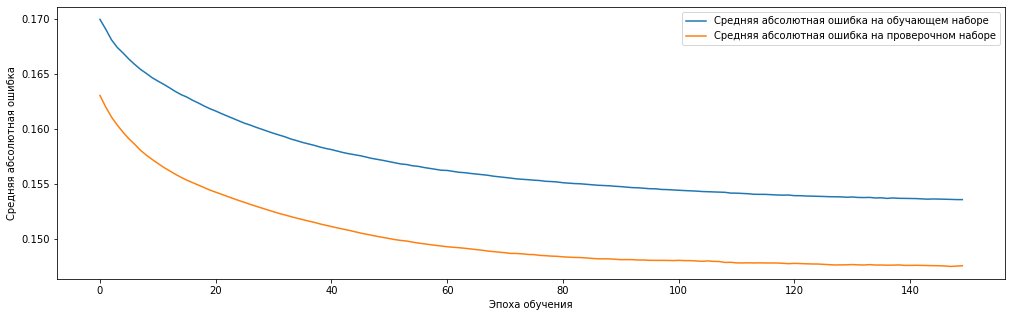

In [ ]:
# Считаем графики ошибки
plt.figure(figsize = (17,5))
plt.plot(history.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test).flatten()
y_pred_vost = (y_pred * (max_num - min_num)) + min_num
y_test_vost = (y_test * (max_num - min_num)) + min_num
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test_vost, y_pred_vost)))

9/9 [==============================] - 0s 2ms/step
MAE test: 0.703


In [ ]:
y_train_vost = (y_train * (max_num - min_num)) + min_num
print(y_test_vost.min())
print(y_test_vost.max())
print(y_train_vost.min())
print(y_train_vost.max())

0.827015715774293
5.29584199270212
0.547391007365624
5.3141436851035


Все минимальные и максимальные значения после денормализации совпали, значит все значения востановилт верно

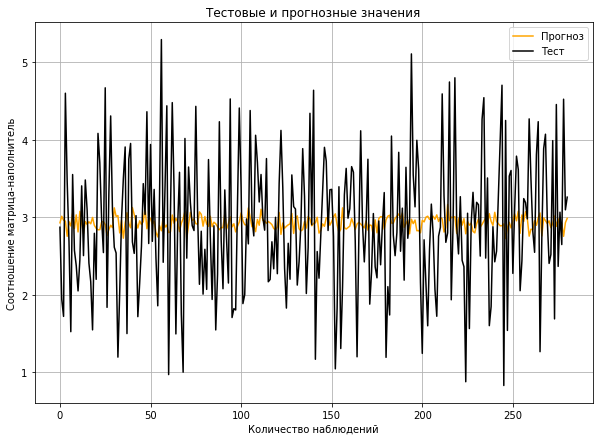

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения")
plt.plot(y_pred_vost, label = "Прогноз", color = "orange")
plt.plot(y_test_vost, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Соотношение матрица-наполнитель")
plt.legend()
plt.grid(True);

# Вторая нейронная сеть 

In [11]:
epochs = 28

model2 = Sequential()
model2.add(Dense(12, activation='sigmoid', input_shape=(X_train.shape[1],))) # softmax, softplus, sigmoid, tanh
model2.add(Dense(12, activation='sigmoid')) # softplus
model2.add(Dense(1, activation='sigmoid')) 
model2.compile(optimizer='SGD', loss='mse', metrics=['mean_absolute_error'])
history2 = model2.fit(X_train, 
                    y_train,  
                    epochs=epochs,
                    validation_split=0.2, 
                    verbose=0)

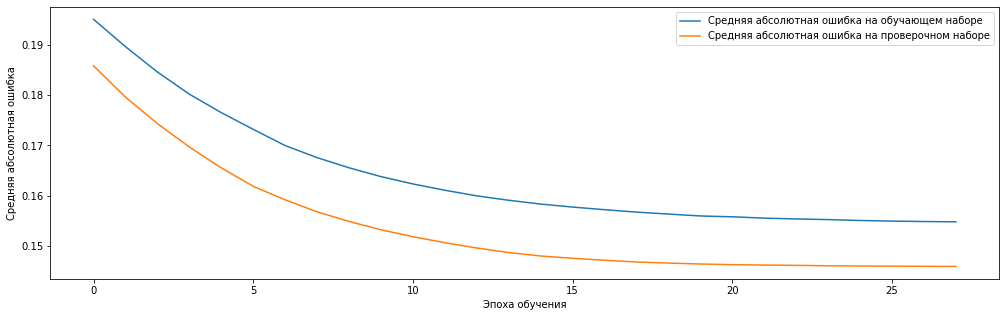

In [12]:
# Считаем графики ошибки
plt.figure(figsize = (17,5))
plt.plot(history2.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history2.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [13]:
y_pred2 = model2.predict(X_test).flatten()
y_pred_vost2 = (y_pred2 * (max_num - min_num)) + min_num
y_test_vost2 = (y_test * (max_num - min_num)) + min_num
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test_vost2, y_pred_vost2)))

9/9 [==============================] - 0s 3ms/step
MAE test: 0.690


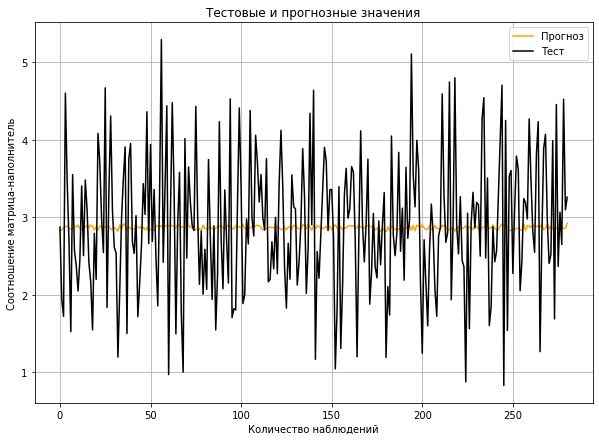

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения")
plt.plot(y_pred_vost2, label = "Прогноз", color = "orange")
plt.plot(y_test_vost2, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Соотношение матрица-наполнитель")
plt.legend()
plt.grid(True);

# Третья нейронная сеть

In [ ]:
epochs = 50

model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(X_train.shape[1],))) # softmax, softplus, sigmoid, tanh
model.add(Dense(8, activation='softplus'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='SGD', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(X_train, 
                    y_train,  
                    epochs=epochs,
                    validation_split=0.2, 
                    verbose=0)

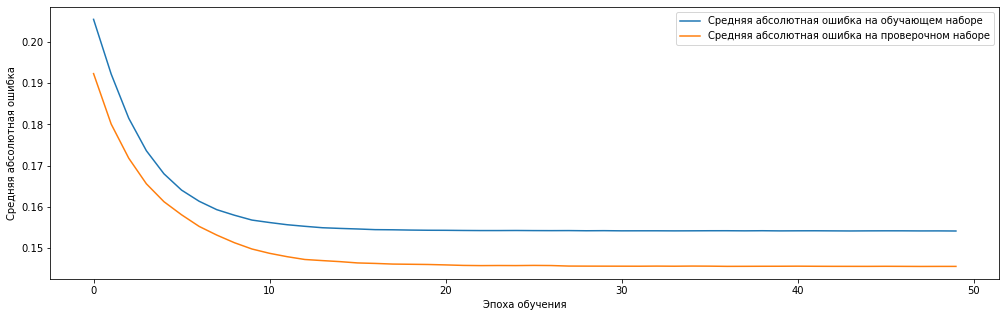

In [ ]:
# Считаем графики ошибки
plt.figure(figsize = (17,5))
plt.plot(history.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test).flatten()
y_pred_vost = (y_pred * (max_num - min_num)) + min_num
y_test_vost = (y_test * (max_num - min_num)) + min_num
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test_vost, y_pred_vost)))

9/9 [==============================] - 0s 2ms/step
MAE test: 0.694


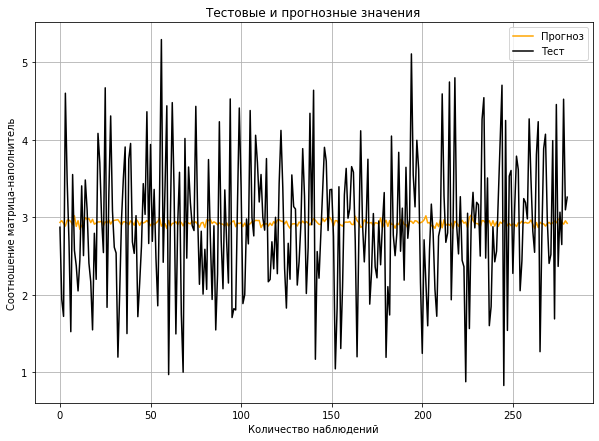

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения")
plt.plot(y_pred_vost, label = "Прогноз", color = "orange")
plt.plot(y_test_vost, label = "Тест", color = "black")
plt.xlabel("Количество наблюдений")
plt.ylabel("Соотношение матрица-наполнитель")
plt.legend()
plt.grid(True);

# Итоги 

В итоге была определена лучшая комбинация, второй вариант нейронной сети 

Сравним точность предсказания по сравнению с простым средним 

In [15]:
#Функция для сравнения результатов предсказаний с средним значением по выборки
def mean_model(y_test_1):
    return [np.mean(y_test_1) for i in range(len(y_test_1))]
y_pred_mean = mean_model(y_test_vost2)

print('MAE mean test_E: {:.3f}'.format(mean_absolute_error(y_test_vost2, y_pred_mean)))
print('Лучшая модель:')
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test_vost2, y_pred_vost2)))

MAE mean test_E: 0.692
Лучшая модель:
MAE test: 0.690


В результате видим несущественное улучшение точности при использовании модели нейронной сети 

In [24]:
model_neuron_path = "/content/drive/MyDrive/Colab Notebooks/my_model_neuron"  # /content/drive/MyDrive/Colab Notebooks/
model2.save(model_neuron_path)

In [26]:
model2_neuron_path = '/content/my_model_neuron'

Загрузка модели

In [29]:
reconstructed_neuron_model = keras.models.load_model(model_neuron_path)

In [31]:
reconstructed_neuron_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [32]:
model2.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_pred2 = reconstructed_neuron_model.predict(X_test).flatten()
y_pred_vost2 = (y_pred2 * (max_num - min_num)) + min_num
print('MAE test: {:.3f}'.format(mean_absolute_error(y_test_vost2, y_pred_vost2)))

9/9 [==============================] - 0s 2ms/step
MAE test: 0.690


Сохраняем модели для определения модуля упругости и прочности

In [82]:
model_E_path = "/content/drive/MyDrive/Colab Notebooks/model_E"
model_S_path = "/content/drive/MyDrive/Colab Notebooks/model_S"

with open("/content/drive/MyDrive/Colab Notebooks/model_E.pkl", 'wb') as f:
  pickle.dump(dtr_grid_E, f)

with open("/content/drive/MyDrive/Colab Notebooks/model_S.pkl", 'wb') as f:
  pickle.dump(dtr_grid_S, f)


In [83]:
with open("/content/drive/MyDrive/Colab Notebooks/model_E.pkl", 'rb') as f:
  load_model_E = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/model_S.pkl", 'rb') as f:
  load_model_S = pickle.load(f)